# Customer Segmentation Analysis for Churn Risk Prediction:


In [303]:
# Importing necessary libraries for data analysis, visualization, and preprocessing
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations and handling arrays
import matplotlib.pyplot as plt  # Matplotlib for plotting visualizations
import seaborn as sns  # Seaborn for statistical data visualization
from sklearn.preprocessing import LabelEncoder  # LabelEncoder for encoding categorical data
import itertools  # itertools for working with iterators and generating combinations, permutations, etc.
from matplotlib.ticker import PercentFormatter  # PercentFormatter for formatting axis ticks as percentages in Matplotlib plots

In [304]:
# Setting the style and color palette for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

In [305]:
# Ensuring reproducibility by setting a fixed seed for random operations
np.random.seed(42)

### Dataset : Telco Customer Churn (https://www.kaggle.com/datasets/blastchar/telco-customer-churn )

In [291]:
# Load the dataset 
# The dataset is loaded into a pandas DataFrame from a CSV file.
df = pd.read_csv("C:\\VS Code\\Advance programming\\Project\\Telco-Customer-Churn.csv")

In [292]:
# Adding a new feature "TotalCharges" calculated as the product of tenure and MonthlyCharges.
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']


In [293]:
# Convert the "Churn" and "SeniorCitizen" feature from categorical ("Yes"/"No") to numeric (1/0) for analysis.
# This transformation allows us to use this feature in numerical calculations.
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})


In [294]:
# Create a function to save figures
def save_fig(fig, name):
    # Add this function if you need to save figures
    fig.savefig(f"{name}.png", bbox_inches='tight', dpi=300)

# Helper function to calculate churn rate by a specific feature like gender, payment method.
# Churn rate is calculated by grouping the data by the feature and computing the mean of Churn_numeric.
def churn_rate(df, feature):
    return df.groupby(feature)['Churn_numeric'].mean() * 100


In [295]:
# Function to plot countplots (visualize the count of values of a feature, categorized by Churn status)
def plot_countplot(df, feature, title, figsize=(10, 6)):
    # Create a countplot showing how the feature (e.g., gender, payment method) relates to churn
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=df, x=feature, hue='Churn', palette=['#1E88E5', '#D81B60'])  # Set color for churn status
    ax.set_title(title, fontsize=15)  # Add title
    ax.set_xlabel(feature, fontsize=12)  # Label x-axis
    ax.set_ylabel('Count', fontsize=12)  # Label y-axis
    plt.legend(title='Churn')  # Add legend for churn categories (Yes/No)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    return fig  # Return the figure for saving or further use

In [296]:
def plot_churn_rate(df, feature, title, figsize=(10, 6)):
    # Create a bar chart showing churn rate by the given feature
    fig, ax = plt.subplots(figsize=figsize)
    churn_by_feat = churn_rate(df, feature)  # Calculate churn rates
    churn_by_feat.plot(kind='bar', color='#D81B60')  # Plot the churn rates as a bar chart
    ax.set_title(title, fontsize=15)  # Set the title
    ax.set_xlabel(feature, fontsize=12)  # Label x-axis
    ax.set_ylabel('Churn Rate (%)', fontsize=12)  # Label y-axis
    ax.yaxis.set_major_formatter(PercentFormatter())  # Format y-axis as percentage
    plt.tight_layout()  # Adjust layout to ensure everything fits
    return fig  # Return the figure for saving or further use

In [297]:
# Function to create distribution plots
def plot_distribution(df, feature, title, figsize=(10, 6)):
    # Create a figure and axes object for plotting
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create a distribution plot with a KDE (Kernel Density Estimate) overlay
    # The `hue='Churn'` parameter differentiates the distribution by churn status (Yes/No)
    sns.histplot(data=df, x=feature, hue='Churn', kde=True, palette=['#1E88E5', '#D81B60'], alpha=0.6)
    
    # Set the title of the plot
    ax.set_title(title, fontsize=15)
    
    # Label the x-axis (feature name)
    ax.set_xlabel(feature, fontsize=12)
    
    # Label the y-axis (Count of occurrences)
    ax.set_ylabel('Count', fontsize=12)
    
    # Add a legend for the 'Churn' categories (Yes/No)
    plt.legend(title='Churn')
    
    # Adjust layout to ensure that nothing is cut off, especially when labels or titles are long
    plt.tight_layout()
    
    # Return the figure for further use (saving or displaying)
    return fig



## 1. Comparision of churn rate by Dependents and Senior Citizen



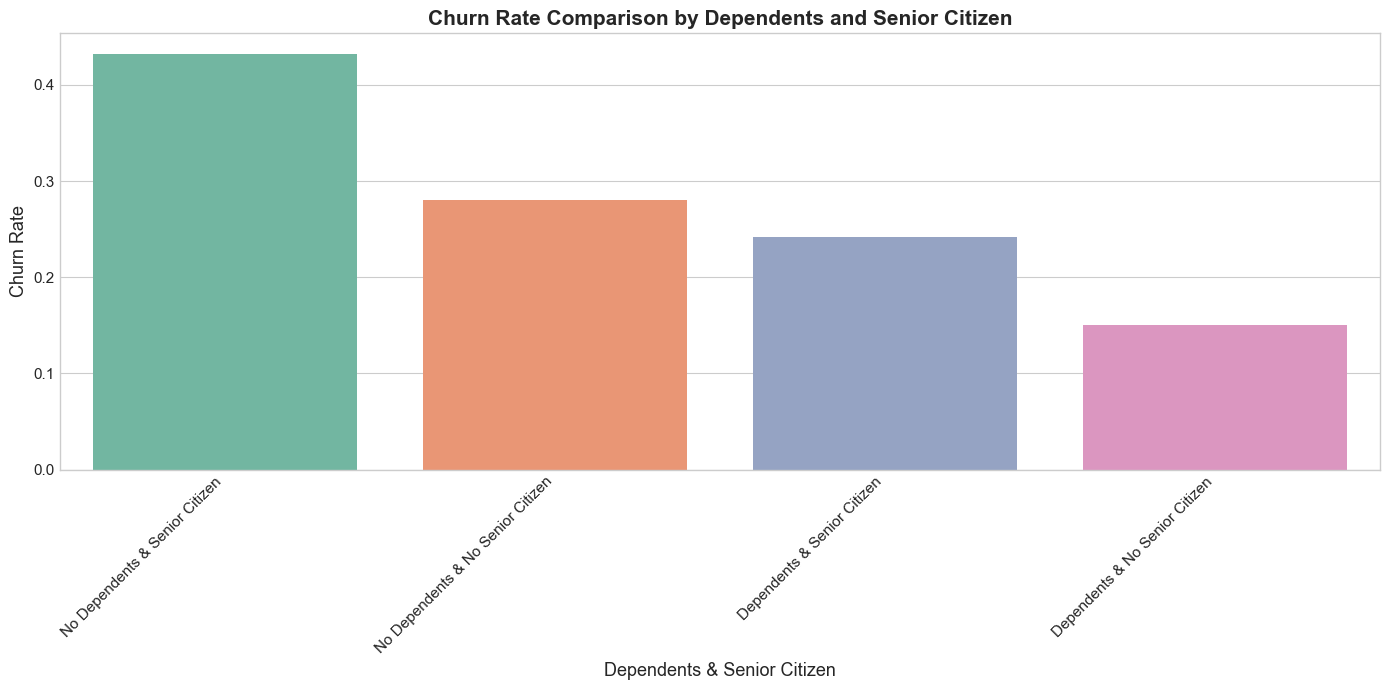

In [298]:
# Ensure 'Churn' column is numeric (convert 'Yes' to 1 and 'No' to 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Dictionary to map columns to more readable names for plotting
col_rename = {
    'Dependents': 'Dependents',  # Renaming 'Dependents' column to 'Dependents' for readability (no change in this case)
    'SeniorCitizen': 'Senior Citizen',  # Renaming 'SeniorCitizen' to 'Senior Citizen' for readability
}

# Rename columns in the dataframe based on the col_rename mapping for easier plotting
df_renamed = df.rename(columns=col_rename)

# List of the renamed columns to consider for pairwise combinations
columns = list(col_rename.values())

# Generate all possible pairs of columns from the renamed columns list
column_pairs = list(itertools.combinations(columns, 2))

# Loop through each pair of columns (col1, col2) and generate a new 'Category' column based on combinations of values
for col1, col2 in column_pairs:
    # Create a new 'Category' column by combining values of col1 and col2 with labels
    df_renamed['Category'] = df_renamed[col1].astype(str).replace({'Yes': col1, 'No': f'No {col1}'}) + \
                             " & " + \
                             df_renamed[col2].astype(str).replace({'Yes': col2, 'No': f'No {col2}'})
    
    # Group data by the newly created 'Category' column and calculate the churn rate for each category
    churn_rates = df_renamed.groupby('Category')['Churn'].mean().reset_index()

    # Sort the churn rates in descending order, with the highest churn rate at the top
    churn_rates = churn_rates.sort_values(by='Churn', ascending=False)

    # Plot the churn rate comparison for each combination of 'col1' and 'col2'
    plt.figure(figsize=(14, 7))  # Set figure size
    sns.barplot(
        data=churn_rates,  # Use the churn_rates DataFrame for plotting
        x='Category',  # Set 'Category' as x-axis for different combinations
        y='Churn',  # Set 'Churn' as y-axis to show the churn rate
        hue='Category',  # Hue will color the bars based on category
        palette='Set2',  # Use the 'Set2' color palette for the bars
        legend=False  # Disable the legend (because hue already indicates category)
    )

    # Rotate x-axis labels to prevent overlap and make them more readable
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)

    # Set labels and title for the plot
    plt.xlabel(f"{col1} & {col2}", fontsize=13)  # X-axis label is based on the column pair
    plt.ylabel("Churn Rate", fontsize=13)  # Y-axis label is fixed as 'Churn Rate'
    plt.title(f"Churn Rate Comparison by {col1} and {col2}", fontsize=15, fontweight='bold')  # Title indicating the comparison

    # Adjust layout for better fit and display the plot
    plt.tight_layout()  # Ensure that everything fits within the plot area
    plt.show()  # Display the plot for the current column pair

## 2. Relationship between tenure group and churn rate

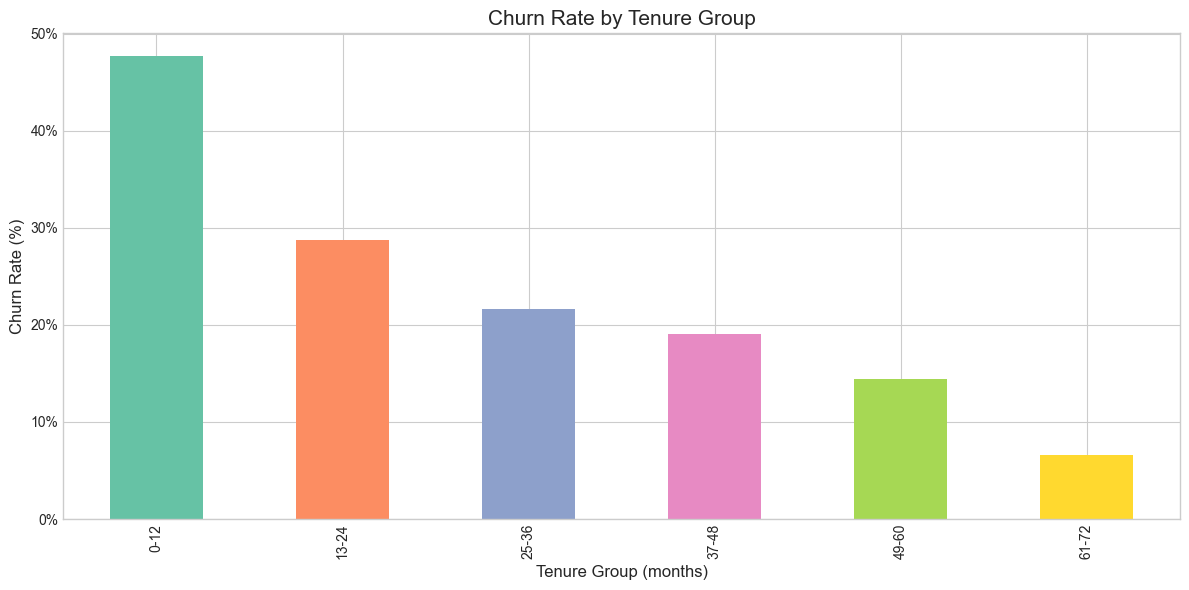

In [299]:
# Define the churn_rate function
def churn_rate(df, feature):
    # Explicitly set observed=False to prevent the FutureWarning
    return df.groupby(feature, observed=False)['Churn_numeric'].mean() * 100

# 2. Relationship between tenure and churn rate

# Create a figure and axis for plotting with specific size
fig3, ax3 = plt.subplots(figsize=(12, 6))

# Define the bins for tenure (customer duration) in months and corresponding labels for each bin
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']

# Create a new column 'tenure_group' that categorizes customers based on their 'tenure' values
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)

# Calculate the churn rate for each tenure group using the 'churn_rate' function
churn_by_tenure = churn_rate(df, 'tenure_group')

# Create a bar plot to visualize the churn rate for each tenure group
churn_by_tenure.plot(kind='bar', color=sns.color_palette('Set2'))

# Set the title and labels for the plot
ax3.set_title('Churn Rate by Tenure Group', fontsize=15)
ax3.set_xlabel('Tenure Group (months)', fontsize=12)
ax3.set_ylabel('Churn Rate (%)', fontsize=12)

# Format the y-axis to display churn rate as percentage (0.1 becomes 10%, for example)
ax3.yaxis.set_major_formatter(PercentFormatter())

# Adjust the layout to ensure the plot elements (labels, title) fit properly within the figure area
plt.tight_layout()

## 3. Relationship between Payment Method and churn rate


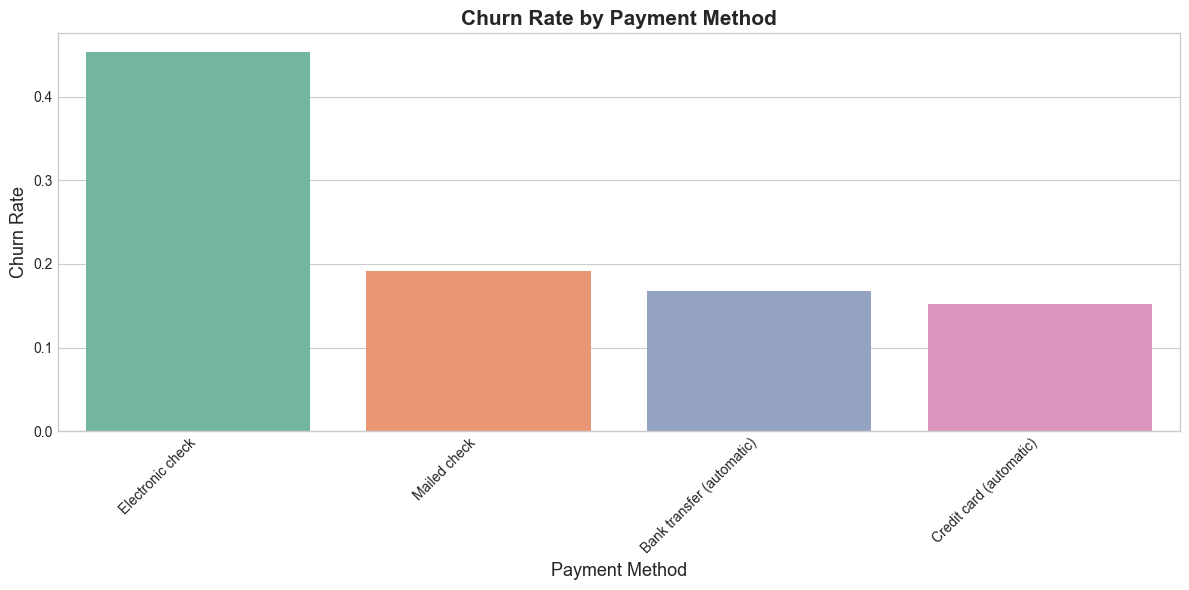

In [300]:
# Check if necessary columns exist in df
if 'PaymentMethod' in df.columns and 'Churn' in df.columns:
    # Create a figure and axis for the plot with a specific size
    fig7, ax7 = plt.subplots(figsize=(12, 6))

    # Group the data by 'PaymentMethod', calculate the mean churn rate for each payment method, 
    # and sort the values in descending order to show the payment methods with the highest churn first
    churn_rates = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)

    # Create a bar plot with the churn rates for each payment method
    sns.barplot(
        x=churn_rates.index,  # Payment methods on the x-axis
        y=churn_rates.values,  # Churn rates on the y-axis
        hue=churn_rates.index,  # Add this line to remove the deprecation warning
        palette='Set2',  # Use the 'Set2' color palette for bars
        ax=ax7  # Plotting on the specified axes
    )

    # Set the title of the plot with a bold font and appropriate font size
    ax7.set_title('Churn Rate by Payment Method', fontsize=15, fontweight='bold')

    # Label the x-axis as "Payment Method" with a font size of 13
    ax7.set_xlabel('Payment Method', fontsize=13)

    # Label the y-axis as "Churn Rate" with a font size of 13
    ax7.set_ylabel('Churn Rate', fontsize=13)

    # Rotate the x-axis labels by 45 degrees to avoid overlapping, with alignment to the right
    plt.xticks(rotation=45, ha='right')

    # Adjust the layout to ensure the plot elements fit properly inside the figure
    plt.tight_layout()

    # Display the plot
    plt.show()

else:
    print("DataFrame is missing required columns: 'PaymentMethod' or 'Churn'")

## 4. Comparision of churn rate with respect to Average Monthly Charges using Tenure churn Category

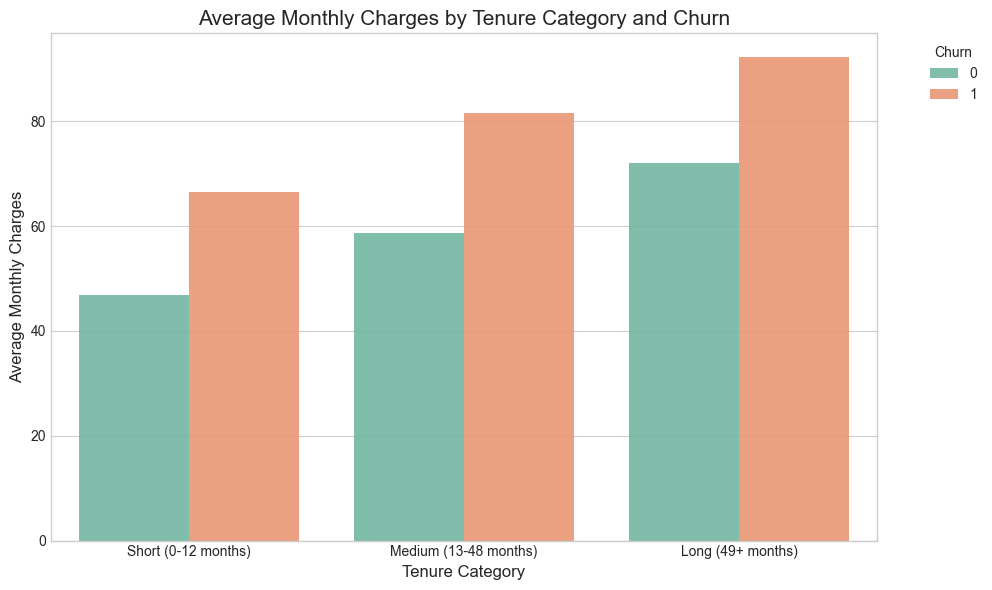

In [301]:
# Create tenure categories
bins = [0, 12, 48, df['tenure'].max()]
labels = ['Short (0-12 months)', 'Medium (13-48 months)', 'Long (49+ months)']
df['TenureCategory'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Calculate average monthly charges per tenure category and churn status
# Add observed=False to avoid the FutureWarning
avg_charges = df.groupby(['TenureCategory', 'Churn'], observed=False)['MonthlyCharges'].mean().reset_index()

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=avg_charges, x='TenureCategory', y='MonthlyCharges', hue='Churn', 
            palette='Set2', alpha=0.9)  # Using Set2 palette

# Labels and title
ax.set_title('Average Monthly Charges by Tenure Category and Churn', fontsize=15)
ax.set_xlabel('Tenure Category', fontsize=12)
ax.set_ylabel('Average Monthly Charges', fontsize=12)

# Adjust legend and layout
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display plot
plt.show()


## 5. Comparision of churn rate by StreamingTV and Gender


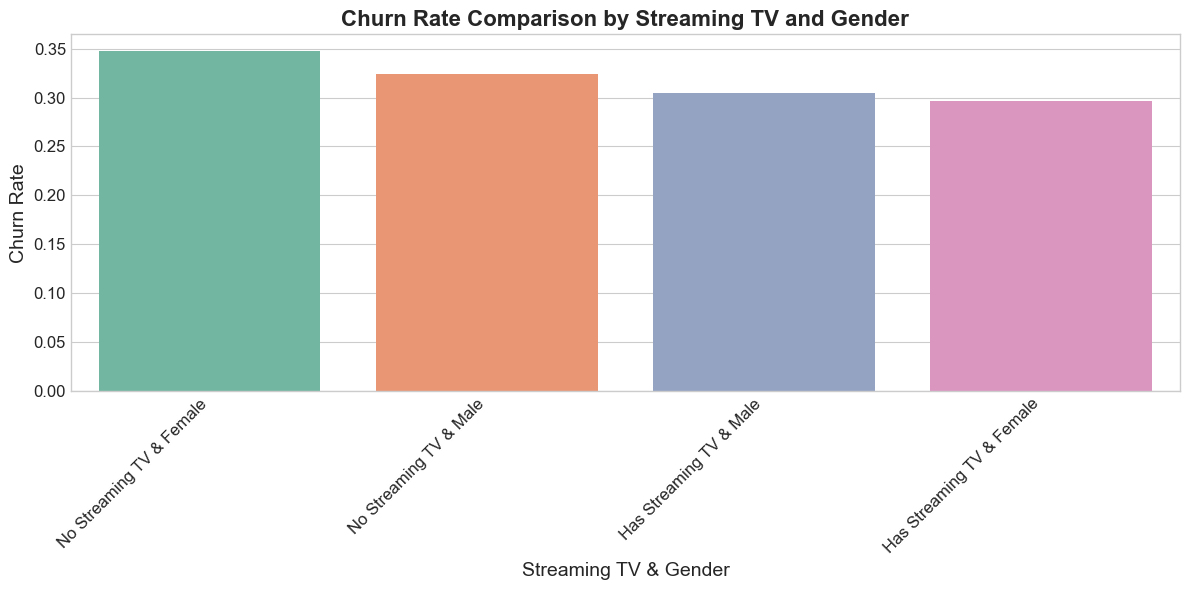

In [302]:

# Create a new 'Category' column by combining 'StreamingTV' and 'gender'
df['Category'] = df['StreamingTV'].map({'Yes': 'Has Streaming TV', 'No': 'No Streaming TV'}) + \
                 ' & ' + \
                 df['gender']

# Calculate churn rates by the newly created 'Category' column and sort the values in descending order
churn_rates = df.groupby('Category')['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)

# Create a bar plot to visualize churn rates for each category
plt.figure(figsize=(12, 6))
sns.barplot(data=churn_rates, x='Category', y='Churn', hue='Category', palette='Set2')

# Adjust the appearance of the plot with labels, title, and tick formatting
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Streaming TV & Gender', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.title('Churn Rate Comparison by Streaming TV and Gender', fontsize=16, fontweight='bold')

# Adjust the layout to ensure all elements fit properly
plt.tight_layout()

# Display the plot
plt.show()